In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [19]:
# Create an endpoint URL for a city.
#url="http://api.openweathermap.org/data/2.5/weather?"
#city='London'


In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [22]:
#query_url=url+'appid=' + weather_api_key + '&q=' +city

In [23]:
#weather_response=requests.get(query_url)
#weather_json=weather_response.json()

In [24]:
#weather_json.keys()

In [25]:
#weather_json.get('main')

In [26]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [27]:
city_weather.status_code

200

In [28]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [30]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":82.83,"feels_like":81.81,"temp_min":78.12,"temp_max":87.24,"pressure":1017,"humidity":37},"visibility":10000,"wind":{"speed":9.22,"deg":290,"gust":17.27},"clouds":{"all":75},"dt":1656962323,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1656925963,"sunset":1656980654},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [31]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 82.83,
  'feels_like': 81.81,
  'temp_min': 78.12,
  'temp_max': 87.24,
  'pressure': 1017,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 290, 'gust': 17.27},
 'clouds': {'all': 75},
 'dt': 1656962323,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1656925963,
  'sunset': 1656980654},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [32]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [33]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [34]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 82.83,
  'feels_like': 81.81,
  'temp_min': 78.12,
  'temp_max': 87.24,
  'pressure': 1017,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 290, 'gust': 17.27},
 'clouds': {'all': 75},
 'dt': 1656962323,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1656925963,
  'sunset': 1656980654},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [35]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data['sys']['country']

'US'

In [36]:
boston_data['dt']

1656962323

In [37]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 87.24 37 75 9.22


In [38]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
## Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"{city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabanan
Processing Record 2 of Set 1 | samusu
samusu not found. Skipping...
Processing Record 3 of Set 1 | biak
Processing Record 4 of Set 1 | killam
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | sorong
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | merauke
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | verkhoyansk
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | mutata
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | setermoen
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | russell
Processing Record 23

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tabanan,-8.5413,115.1252,79.20,94,100,4.16,ID,2022-07-04 19:20:51
1,Biak,-0.9131,122.8766,75.76,86,47,7.11,ID,2022-07-04 19:20:52
2,Killam,52.7834,-111.8518,69.75,56,100,9.22,CA,2022-07-04 19:20:52
3,Ushuaia,-54.8000,-68.3000,37.06,81,75,11.50,AR,2022-07-04 19:19:58
4,Albany,42.6001,-73.9662,82.94,28,32,1.99,US,2022-07-04 19:20:53
5,Sorong,-0.8833,131.2500,78.12,91,100,7.31,ID,2022-07-04 19:20:53
6,Bengkulu,-3.8004,102.2655,75.63,91,36,4.65,ID,2022-07-04 19:20:54
7,Yellowknife,62.4560,-114.3525,68.56,40,20,10.36,CA,2022-07-04 19:16:34
8,Butaritari,3.0707,172.7902,82.83,74,98,20.04,KI,2022-07-04 19:20:54
9,Merauke,-8.4667,140.3333,77.20,88,92,11.41,ID,2022-07-04 19:20:54


In [41]:
new_col=['City','Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_col]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tabanan,ID,2022-07-04 19:20:51,-8.5413,115.1252,79.20,94,100,4.16
1,Biak,ID,2022-07-04 19:20:52,-0.9131,122.8766,75.76,86,47,7.11
2,Killam,CA,2022-07-04 19:20:52,52.7834,-111.8518,69.75,56,100,9.22
3,Ushuaia,AR,2022-07-04 19:19:58,-54.8000,-68.3000,37.06,81,75,11.50
4,Albany,US,2022-07-04 19:20:53,42.6001,-73.9662,82.94,28,32,1.99


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [44]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1656963411.285856

In [45]:
today=time.strftime('%x')
today

'07/04/22'

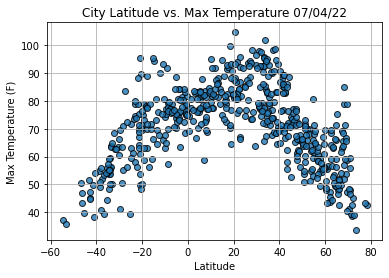

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig1.png")

# Show plot.
plt.show()

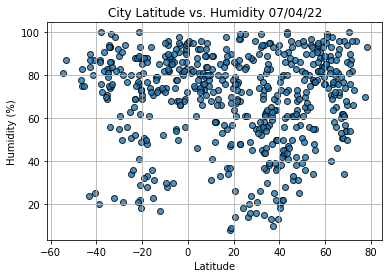

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

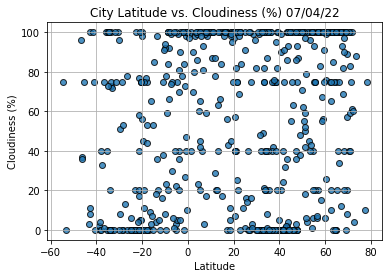

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

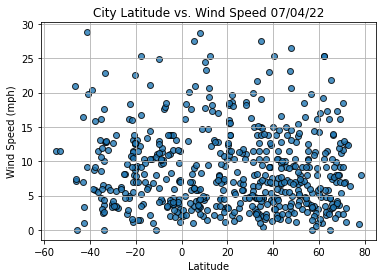

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [80]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'r:{r_value:.4f}')

In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

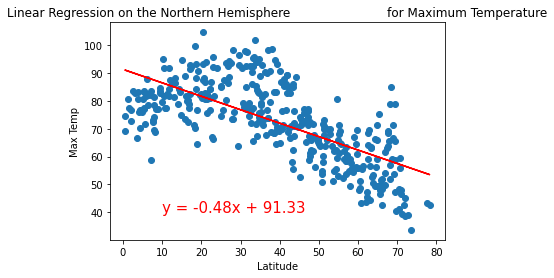

r:-0.6808


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


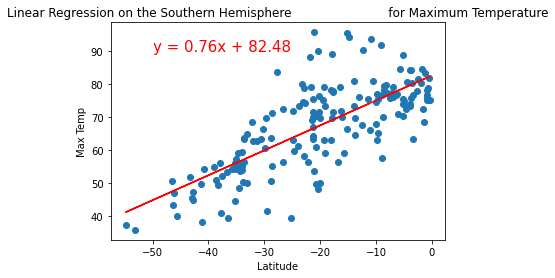

r:0.7466


In [83]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

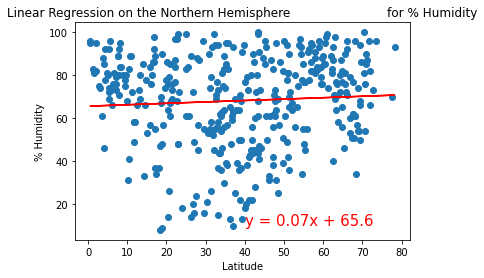

r:0.0613


In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

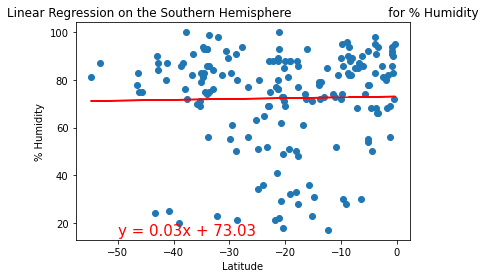

r:0.0219


In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

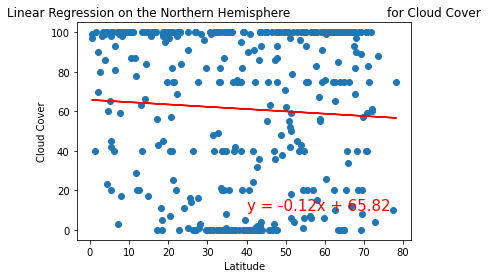

r:-0.0592


In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloud Cover', 'Cloud Cover',(40,10))

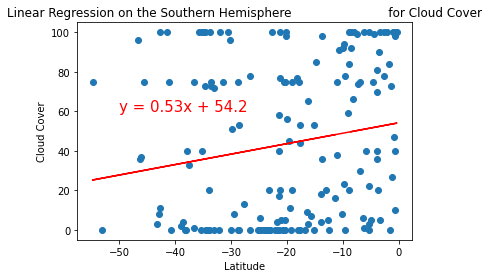

r:0.1740


In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloud Cover', 'Cloud Cover',((-50,60)))

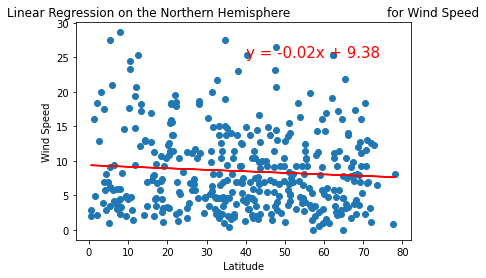

r:-0.0753


In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

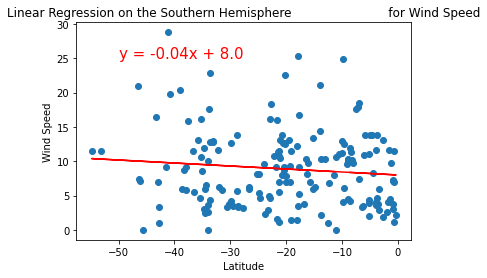

r:-0.1038


In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [92]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

## Package Plan ##

  environment location: E:\Programs\Anaconda\envs\PythonData

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37h03978a9_1        1001 KB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.7-2_cp37m

The following package

In [94]:
jupyter nbextension enable --py --sys-prefix widgetsnbextension

SyntaxError: invalid syntax (2820615700.py, line 1)